In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tmdb_movies = pd.read_csv(r"//home//kera//Documents//TMDB_movie_dataset.csv")

In [3]:
tmdb_movies

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili"
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin"
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish"
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989753,658330,My Land Zion,0.000,0,Released,2004-12-02,0,0,False,NaN,...,en,My Land Zion,Yulie Cohen Gerstel who left New York to give ...,0.600,/navu6gD6aIiHZAOQveNMYWvKOL6.jpg,NaN,NaN,NaN,NaN,NaN
989754,658341,Robert E/ Green's Big Adventure,0.000,0,Released,NaN,0,4,False,NaN,...,en,Robert E/ Green's Big Adventure,A short surreal animation.,0.600,/fsxwZcIbFfYezZlBOMhLaEQjuy.jpg,A short surreal animation,Animation,NaN,NaN,NaN
989755,658343,Runon kuningas ja muuttolintu,0.000,0,Released,1940-10-06,0,116,False,NaN,...,fi,Runon kuningas ja muuttolintu,A poet finds a new muse in young woman.,0.683,/yD3gATvW3SrqEcHvA3p1ZDpcRKx.jpg,NaN,"Drama, History",Suomen Filmiteollisuus,Finland,Finnish
989756,658344,Mommy Sucks,0.000,0,Released,2015-08-06,0,192,True,NaN,...,en,Mommy Sucks,You might think she's strict but really you ca...,0.600,/oF0zeCeMs54kevJhorJShUFrQXg.jpg,NaN,NaN,Explicit Empire,NaN,English


In [4]:
tmdb_movies.shape

(989758, 23)

In [5]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989758 entries, 0 to 989757
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    989758 non-null  int64  
 1   title                 989746 non-null  object 
 2   vote_average          989758 non-null  float64
 3   vote_count            989758 non-null  int64  
 4   status                989758 non-null  object 
 5   release_date          880653 non-null  object 
 6   revenue               989758 non-null  int64  
 7   runtime               989758 non-null  int64  
 8   adult                 989758 non-null  bool   
 9   backdrop_path         282972 non-null  object 
 10  budget                989758 non-null  int64  
 11  homepage              107336 non-null  object 
 12  imdb_id               568804 non-null  object 
 13  original_language     989758 non-null  object 
 14  original_title        989746 non-null  object 
 15  

In [6]:
tmdb_movies['release_date'] = pd.to_datetime(tmdb_movies['release_date'])
tmdb_movies['release_date'].head()

0   2010-07-15
1   2014-11-05
2   2008-07-16
3   2009-12-15
4   2012-04-25
Name: release_date, dtype: datetime64[ns]

In [7]:
from datetime import datetime
tmdb_movies['release_year'] = tmdb_movies['release_date'].dt.year
tmdb_movies = tmdb_movies.loc[(tmdb_movies['release_year'] > 1932) & (tmdb_movies['release_year'] <2030)]

In [8]:
tmdb_movies.describe()

,id,vote_average,vote_count,revenue,runtime,budget,popularity,release_year
count,8.451710e+05,845171.000000,845171.000000,8.451710e+05,845171.000000,8.451710e+05,845171.000000,845171.000000
mean,6.242149e+05,2.362786,25.214858,8.574000e+05,55.687057,3.339686e+05,1.494031,2002.352723
std,3.447585e+05,3.199633,369.085752,1.901796e+07,63.602827,5.313457e+06,8.778295,21.368238
min,2.000000e+00,0.000000,0.000000,-1.200000e+01,0.000000,0.000000e+00,0.000000,1933.000000
25%,3.441795e+05,0.000000,0.000000,0.000000e+00,5.000000,0.000000e+00,0.600000,1992.000000
50%,6.174440e+05,0.000000,0.000000,0.000000e+00,52.000000,0.000000e+00,0.600000,2011.000000
75%,9.195505e+05,5.500000,2.000000,0.000000e+00,92.000000,0.000000e+00,1.055000,2018.000000
max,1.241511e+06,10.000000,34495.000000,3.000000e+09,14400.000000,8.880000e+08,2994.357000,2029.000000


In [9]:
tmdb_movies.isna().sum()

id                           0
title                        4
vote_average                 0
vote_count                   0
status                       0
release_date                 0
revenue                      0
runtime                      0
adult                        0
backdrop_path           577656
budget                       0
homepage                749030
imdb_id                 338993
original_language            0
original_title               4
overview                139719
popularity                   0
poster_path             186505
tagline                 718878
genres                  271233
production_companies    409078
production_countries    298888
spoken_languages        288307
release_year                 0
dtype: int64

In [10]:
tmdb_movies.fillna(0)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,release_year
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili",2010.0
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,2014.0
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin",2008.0
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish",2009.0
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian",2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989751,658327,The Jesus Factor,0.000,0,Released,2004-04-29,0,0,False,0,...,The Jesus Factor,A look at how President Bush's spiritual belie...,0.600,/9t4nTMtxDza09Do43Bg5afwoo5z.jpg,0,0,0,0,0,2004.0
989752,658329,Pikku pelimanni,0.000,0,Released,1939-11-12,0,99,False,0,...,Pikku pelimanni,0,0.600,/rijsYgLdPqYwK9d0L40WmGN3Lzo.jpg,0,"Drama, Music, Family",Suomen Filmiteollisuus,Finland,Finnish,1939.0
989753,658330,My Land Zion,0.000,0,Released,2004-12-02,0,0,False,0,...,My Land Zion,Yulie Cohen Gerstel who left New York to give ...,0.600,/navu6gD6aIiHZAOQveNMYWvKOL6.jpg,0,0,0,0,0,2004.0
989755,658343,Runon kuningas ja muuttolintu,0.000,0,Released,1940-10-06,0,116,False,0,...,Runon kuningas ja muuttolintu,A poet finds a new muse in young woman.,0.683,/yD3gATvW3SrqEcHvA3p1ZDpcRKx.jpg,0,"Drama, History",Suomen Filmiteollisuus,Finland,Finnish,1940.0


In [11]:
sum(tmdb_movies.duplicated())

7

In [12]:
tmdb_movies = tmdb_movies.drop_duplicates()

print("Afetr Removing Duplicate Values (Rows,Columns) : ",tmdb_movies.shape)

Afetr Removing Duplicate Values (Rows,Columns) :  (845164, 24)


In [13]:
tmdb_movies.drop(['overview','imdb_id','homepage','tagline'],axis =1,inplace = True)
print("Afetr Removing Unused Columns (Rows,Columns) : ",tmdb_movies.shape)

Afetr Removing Unused Columns (Rows,Columns) :  (845164, 20)


In [14]:
print("Rows With Zero Values In The Budget Column:",tmdb_movies[(tmdb_movies['budget']==0)].shape[0])
print("Rows With Zero Values In The Revenue Column:",tmdb_movies[(tmdb_movies['revenue']==0)].shape[0])


Rows With Zero Values In The Budget Column: 804398
Rows With Zero Values In The Revenue Column: 827140


release_year
2024.0    2609
2025.0      86
2026.0      14
2027.0       7
2029.0       5
Name: id, dtype: int64


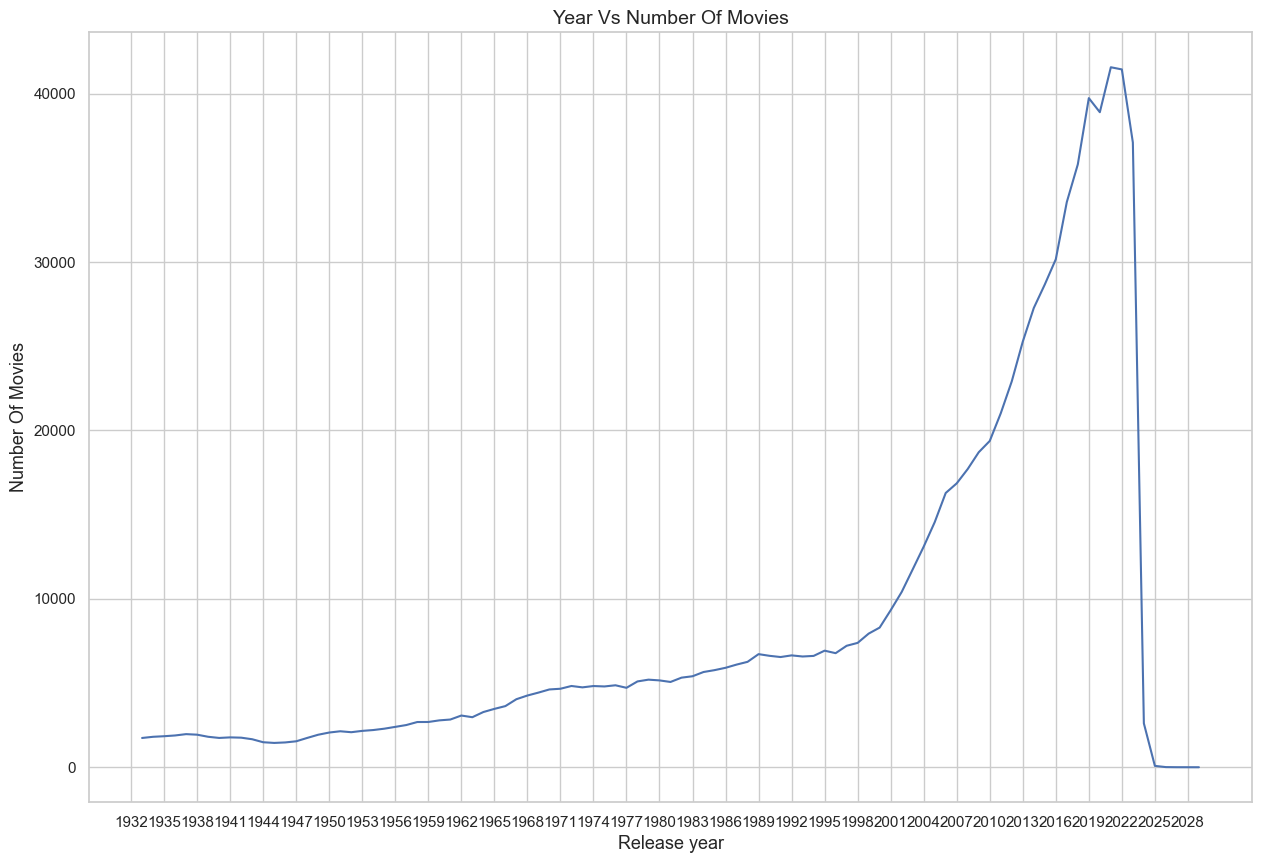

In [16]:
data=tmdb_movies.groupby('release_year').count()['id']
print(data.tail())

#make group of the data according to their release year and count the total number of movies in each year and pot.
tmdb_movies.groupby('release_year').count()['id'].plot(xticks = np.arange(1932,2030,3))

#set the figure size and labels
sns.set(rc={'figure.figsize':(20,10)})
plt.title("Year Vs Number Of Movies",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)
#set the style sheet
sns.set_style("whitegrid")

In [17]:
tmdb_movies['Profit'] = tmdb_movies['revenue'] - tmdb_movies['budget']

In [18]:
def find_minmax(x):
    #use the function 'idmin' to find the index of lowest profit movie.
    min_index = tmdb_movies[x].idxmin()
    #use the function 'idmax' to find the index of Highest profit movie.
    high_index = tmdb_movies[x].idxmax()
    high = pd.DataFrame(tmdb_movies.loc[high_index,:])
    low = pd.DataFrame(tmdb_movies.loc[min_index,:])
    
    #print the movie with high and low profit
    print("Movie Which Has Highest "+ x + " : ",tmdb_movies['original_title'][high_index])
    print("Movie Which Has Lowest "+ x + "  : ",tmdb_movies['original_title'][min_index])
    return pd.concat([high,low],axis = 1)

#call the find_minmax function.
find_minmax('Profit')

Movie Which Has Highest Profit :  Avatar
Movie Which Has Lowest Profit  :  Enea


,3,619658
id,19995,1057999
title,Avatar,Enea
vote_average,7.573,0.0
vote_count,29815,0
status,Released,Released
release_date,2009-12-15 00:00:00,2023-09-21 00:00:00
revenue,2923706026,0
runtime,162,115
adult,False,False
backdrop_path,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,/mY5TuUCeMNAPlsOEtfdpB06JZAy.jpg


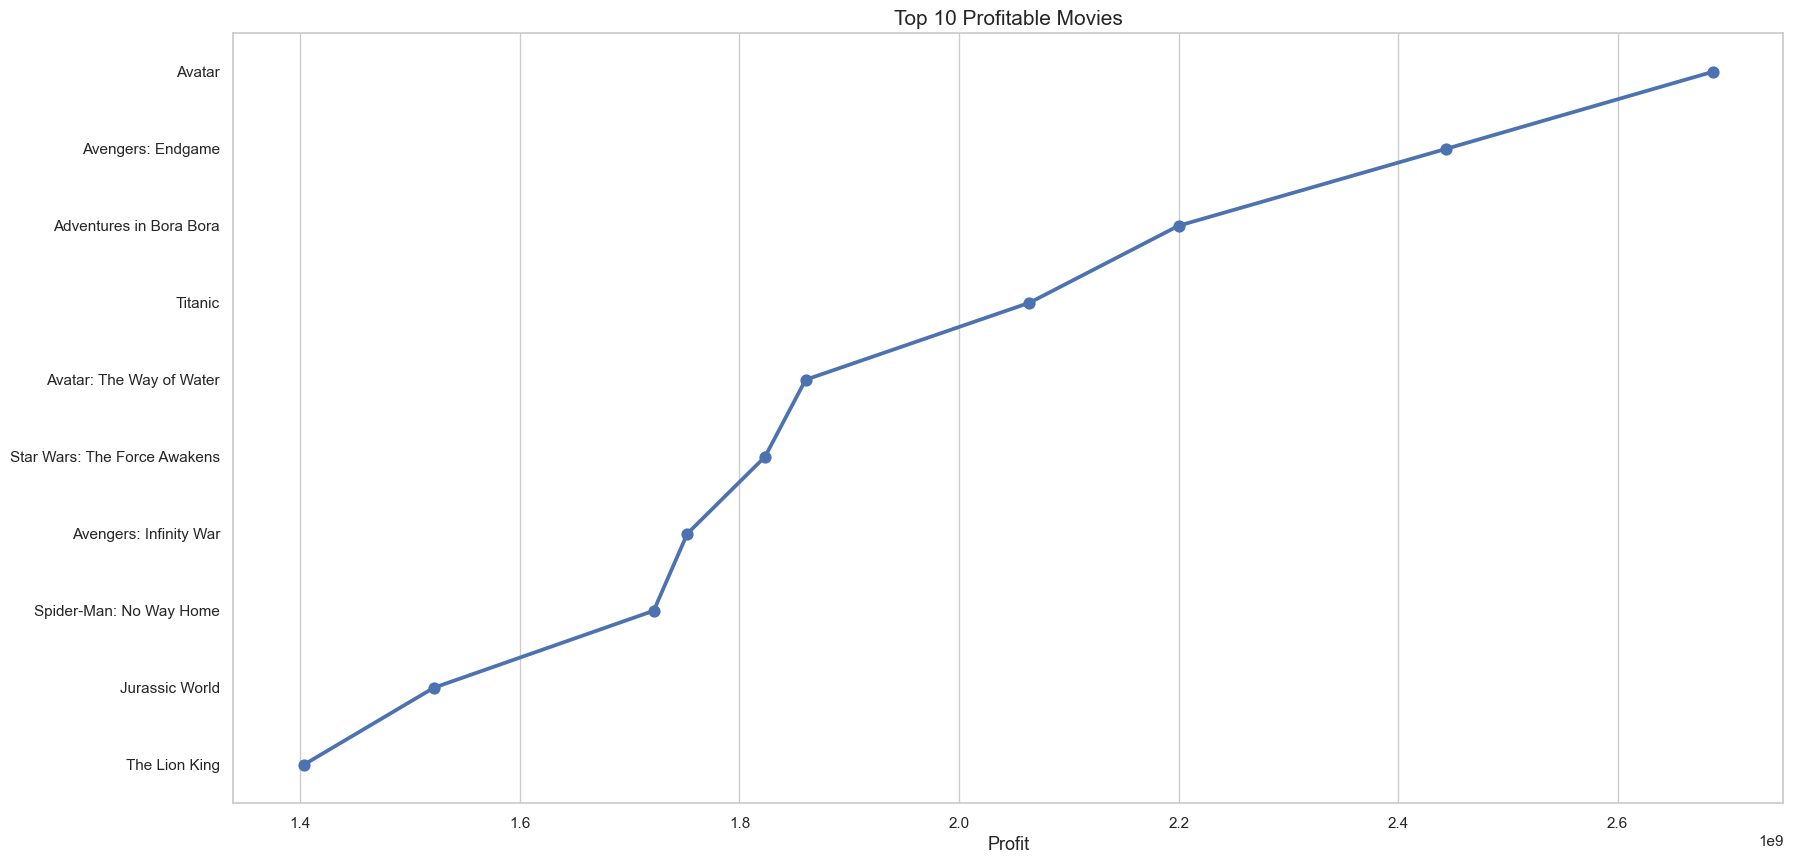

In [19]:
info = pd.DataFrame(tmdb_movies['Profit'].sort_values(ascending = False))
info['original_title'] = tmdb_movies['original_title']
data = list(map(str,(info['original_title'])))
x = list(data[:10])
y = list(info['Profit'][:10])

#make a plot usinf pointplot for top 10 profitable movies.
ax = sns.pointplot(x=y,y=x)

#setup the figure size
sns.set(rc={'figure.figsize':(10,5)})
#setup the title and labels of the plot.
ax.set_title("Top 10 Profitable Movies",fontsize = 15)
ax.set_xlabel("Profit",fontsize = 13)
sns.set_style("darkgrid")

In [20]:
#reader['budget'] = reader['budget'].replace(0,np.NAN)
find_minmax('budget')

Movie Which Has Highest budget :  Enea
Movie Which Has Lowest budget  :  君の名は。


,619658,258
id,1057999,372058
title,Enea,Your Name.
vote_average,0.0,8.514
vote_count,0,10303
status,Released,Released
release_date,2023-09-21 00:00:00,2016-08-26 00:00:00
revenue,0,357986087
runtime,115,106
adult,False,False
backdrop_path,/mY5TuUCeMNAPlsOEtfdpB06JZAy.jpg,/dIWwZW7dJJtqC6CgWzYkNVKIUm8.jpg


/home/kera/.local/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 28040 (\N{CJK UNIFIED IDEOGRAPH-6D88}) missing from current font.
  func(*args, **kwargs)
/home/kera/.local/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from current font.
  func(*args, **kwargs)
/home/kera/.local/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  func(*args, **kwargs)
/home/kera/.local/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 22905 (\N{CJK UNIFIED IDEOGRAPH-5979}) missing from current font.
  func(*args, **kwargs)
/home/kera/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 28040 (\N{CJK UNIFIED IDEOGRAPH-6D88}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/kera/.local/lib/python3.10/site-packages/IPython/core/py

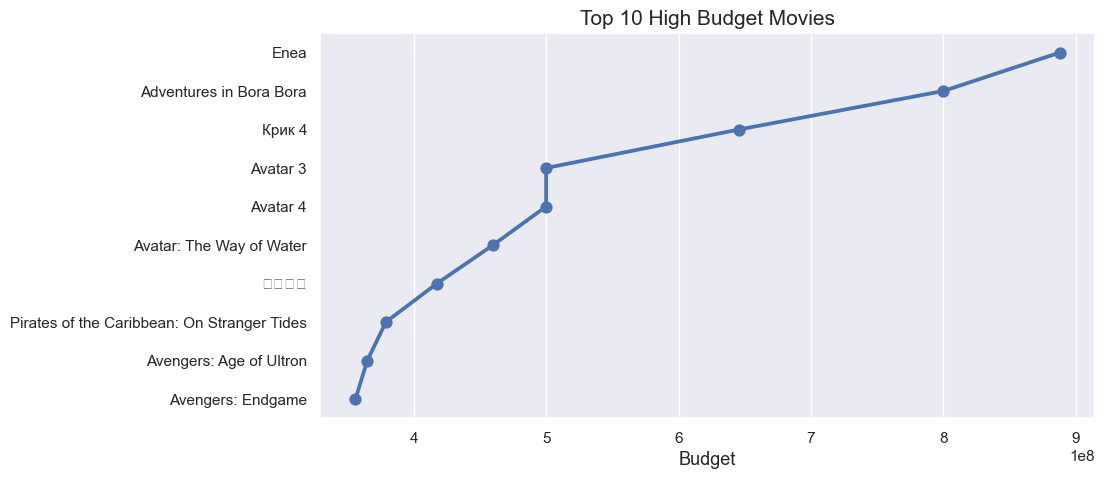

In [21]:
info = pd.DataFrame(tmdb_movies['budget'].sort_values(ascending = False))
info['original_title'] = tmdb_movies['original_title']
data = list(map(str,(info['original_title'])))

#extract the top 10 budget movies data from the list and dataframe.
x = list(data[:10])
y = list(info['budget'][:10])

#plot the figure and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 High Budget Movies",fontsize = 15)
ax.set_xlabel("Budget",fontsize = 13)
sns.set_style("darkgrid")

In [22]:
find_minmax('runtime')

Movie Which Has Highest runtime :  Stora Enso Building, Helsinki
Movie Which Has Lowest runtime  :  Return


,207738,6011
id,251800,320367
title,Modern Times Forever,Return
vote_average,7.0,6.223
vote_count,2,551
status,Released,Released
release_date,2011-03-23 00:00:00,2015-01-01 00:00:00
revenue,0,0
runtime,14400,0
adult,False,False
backdrop_path,NaN,NaN


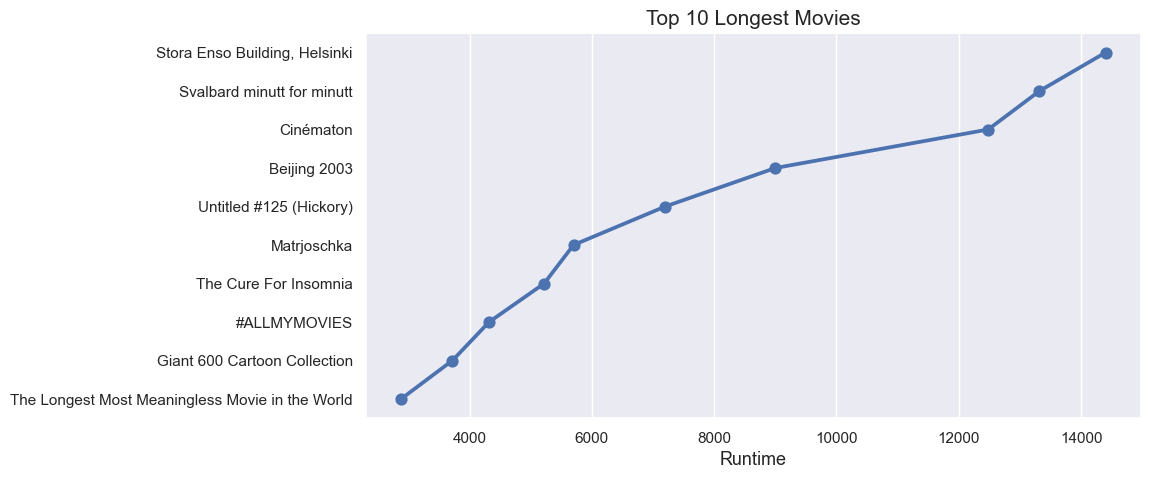

In [23]:
info = pd.DataFrame(tmdb_movies['runtime'].sort_values(ascending = False))
info['original_title'] = tmdb_movies['original_title']
data = list(map(str,(info['original_title'])))

#extract the top 10 longest duraton movies data from the list and dataframe.
x = list(data[:10])
y = list(info['runtime'][:10])

#make the point plot and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 Longest Movies",fontsize = 15)
ax.set_xlabel("Runtime",fontsize = 13)
sns.set_style("darkgrid")

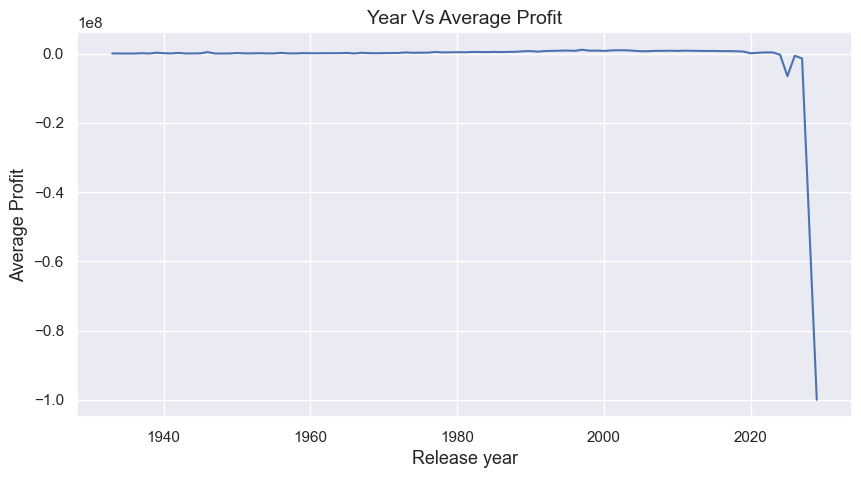

In [24]:
tmdb_movies.groupby('release_year')['Profit'].mean().plot()

#setup the title and labels of the figure.
plt.title("Year Vs Average Profit",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Average Profit',fontsize = 13)

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")

/tmp/ipykernel_2614/1524529402.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmdb_movies.groupby('release_year').mean()['runtime'].plot(xticks = np.arange(1932,2030,5))


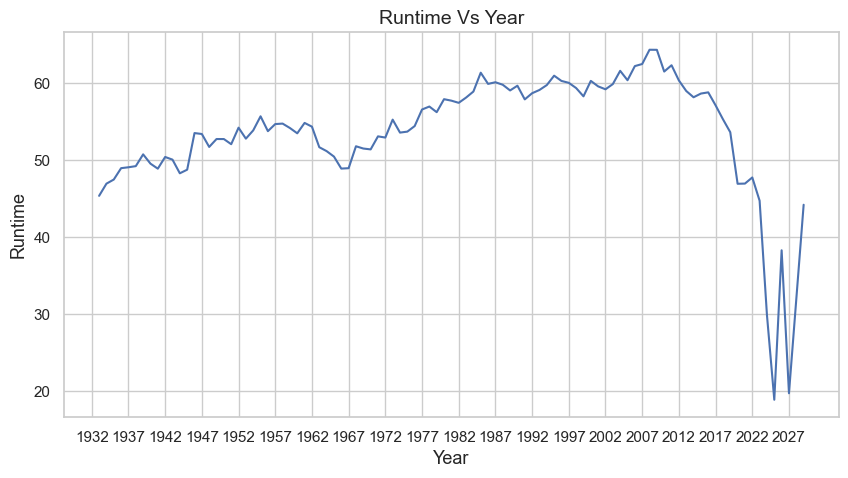

In [25]:
tmdb_movies.groupby('release_year').mean()['runtime'].plot(xticks = np.arange(1932,2030,5))

#setup the figure size.
sns.set(rc={'figure.figsize':(15,5)})

#setup the title of the figure
plt.title("Runtime Vs Year",fontsize = 14)

#setup the x-label and y-label of the plot.
plt.xlabel('Year',fontsize = 13)
plt.ylabel('Runtime',fontsize = 13)
sns.set_style("whitegrid")

/tmp/ipykernel_2614/3913183034.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr = tmdb_movies.corr()


Correlation Between Revenue And Budget :  0.7316602986639373


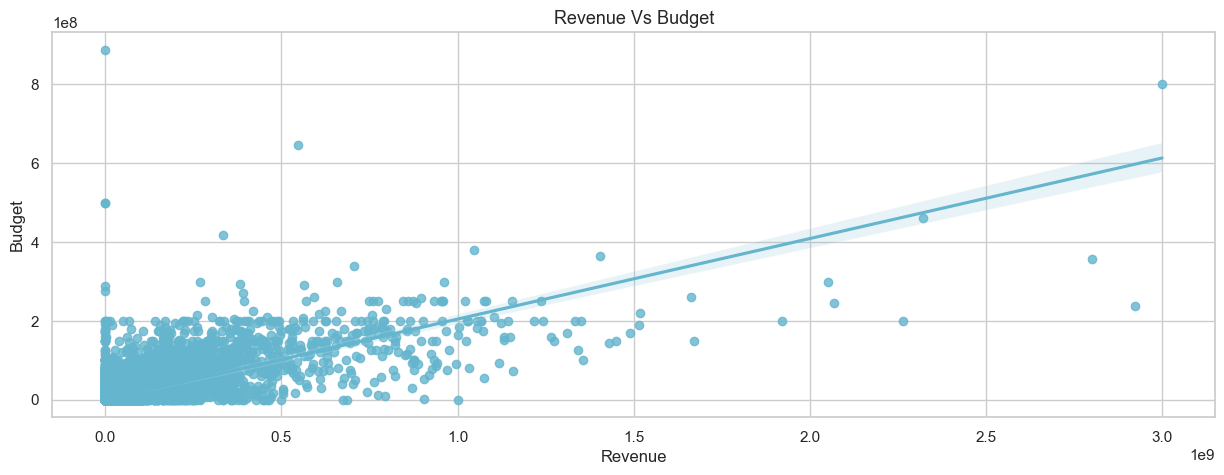

In [26]:
ax = sns.regplot(x=tmdb_movies['revenue'], y=tmdb_movies['budget'],color='c')

#set the title and labels of the figure
ax.set_title("Revenue Vs Budget",fontsize=13)
ax.set_xlabel("Revenue",fontsize=12)
ax.set_ylabel("Budget",fontsize=12)
#set the figure size
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("whitegrid")


data_corr = tmdb_movies.corr()
print("Correlation Between Revenue And Budget : ",data_corr.loc['revenue','budget'])

Correlation Between Profit And Budget :  0.5528560328780967


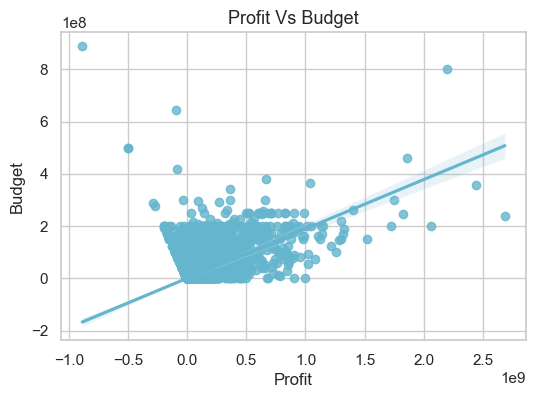

In [27]:
ax = sns.regplot(x=tmdb_movies['Profit'], y=tmdb_movies['budget'],color='c')

#setup the title and the labels of the plot.
ax.set_title("Profit Vs Budget",fontsize=13)
ax.set_xlabel("Profit",fontsize=12)
ax.set_ylabel("Budget",fontsize=12)

#setup the figure size and style sheet of the plot.
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("whitegrid")

#print the correction between them,which was stored in 'data_corr' dataframe earlier.
print("Correlation Between Profit And Budget : ",data_corr.loc['Profit','budget'])

Correlation Between Popularity And Profit :  0.2116412219915265


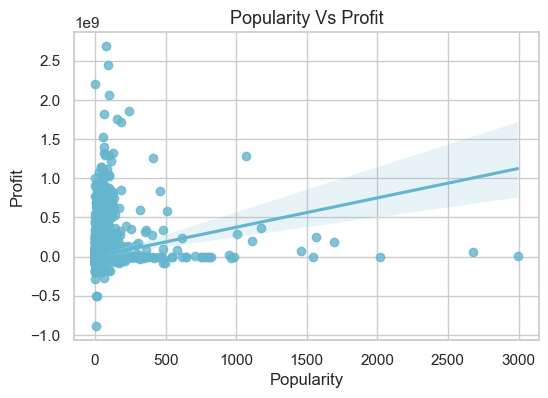

In [28]:
ax = sns.regplot(x=tmdb_movies['popularity'],y=tmdb_movies['Profit'],color='c')

#setup the title and the labels of the scatter plot.
ax.set_title("Popularity Vs Profit",fontsize=13)
ax.set_xlabel("Popularity",fontsize=12)
ax.set_ylabel("Profit",fontsize=12)

#setup the figure size.
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("whitegrid")

#find the correlation between them.
print("Correlation Between Popularity And Profit : ",data_corr.loc['popularity','Profit'])

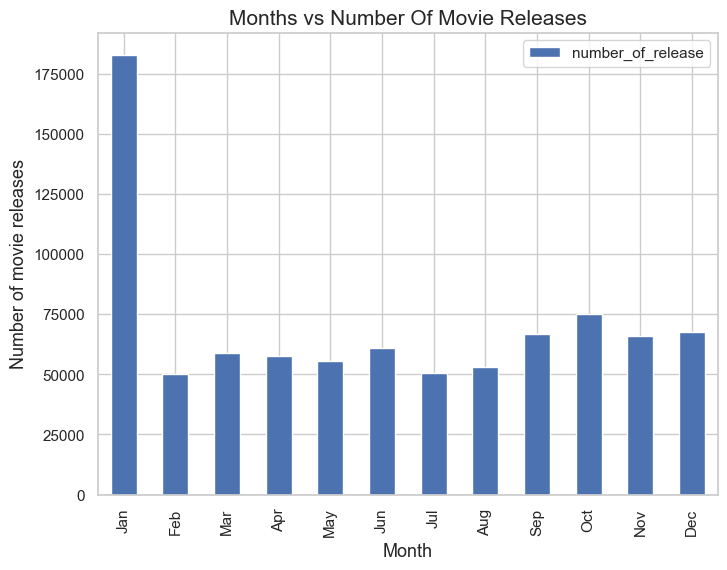

In [29]:
month_release = tmdb_movies['release_date'].dt.month

#count the movies in each month using value_counts().
number_of_release = month_release.value_counts().sort_index()
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
number_of_release = pd.DataFrame(number_of_release)
number_of_release['month'] = months

#change the column name of the new dataframe 'number_of_release'
number_of_release.rename(columns = {'release_date':'number_of_release'},inplace=True)

#plot the bar graph using plot.
number_of_release.plot(x='month',kind='bar',fontsize = 11,figsize=(8,6))

#set the labels and titles of the plot.
plt.title('Months vs Number Of Movie Releases',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Number of movie releases',fontsize = 13)
sns.set_style("darkgrid")

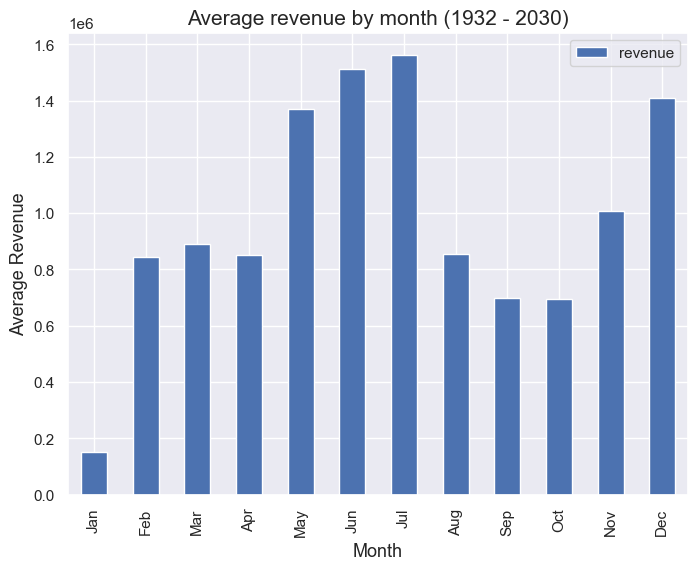

In [30]:
month_release = pd.DataFrame(month_release)

#change the column name of the new dataframe 'month_release'.
month_release.rename(columns = {'release_date':'release_month'},inplace=True)

#add a new column 'revenue' in the dataframe 'month_release'.
month_release['revenue'] = tmdb_movies['revenue']

#make the group of the data according to their month and calculate the mean revenue of each month.
mean_revenue  = month_release.groupby('release_month').mean()
mean_revenue['month'] = months

#make the bar plot using pandas plot function.
mean_revenue.plot(x='month',kind='bar',figsize = (8,6),fontsize=11)

#setup the title and lables of the plot.
plt.title('Average revenue by month (1932 - 2030)',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Average Revenue',fontsize = 13)
sns.set_style("darkgrid")

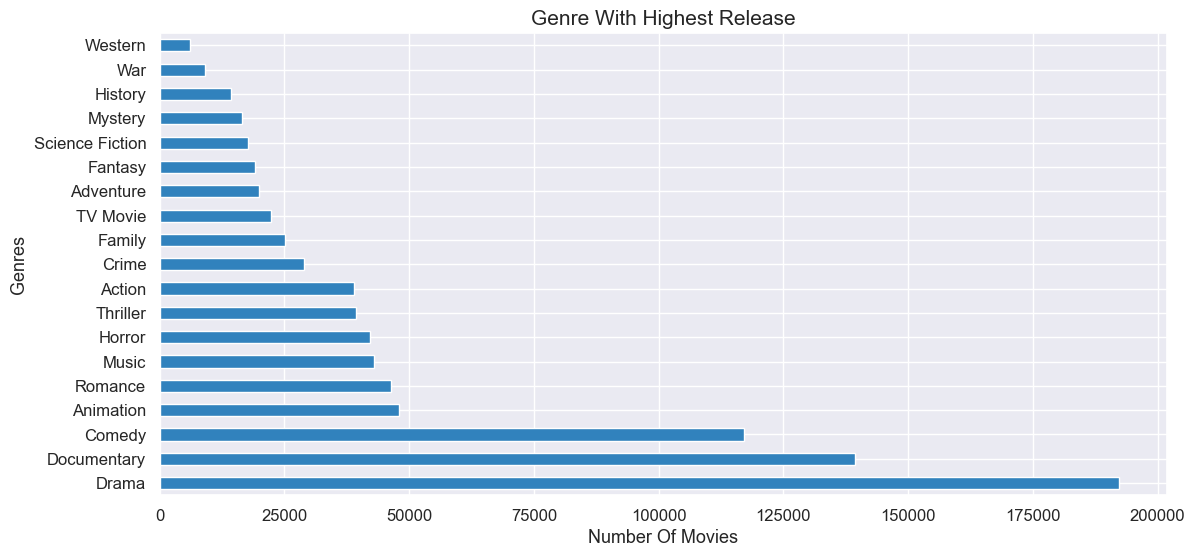

In [31]:
def count_genre(x):
    #concatenate all the rows of the genrs.
    data_plot = tmdb_movies[x].str.cat(sep = ', ')
    data = pd.Series(data_plot.split(', '))
    #conts each of the genre and return.
    info = data.value_counts(ascending=False)
    return info

total_genre_movies = count_genre('genres')
#plot a 'barh' plot using plot function for 'genre vs number of movies'.
total_genre_movies.plot(kind= 'barh',figsize = (13,6),fontsize=12,colormap='tab20c')


#setup the title and the labels of the plot.
plt.title("Genre With Highest Release",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
plt.ylabel("Genres",fontsize= 13)
sns.set_style("whitegrid")


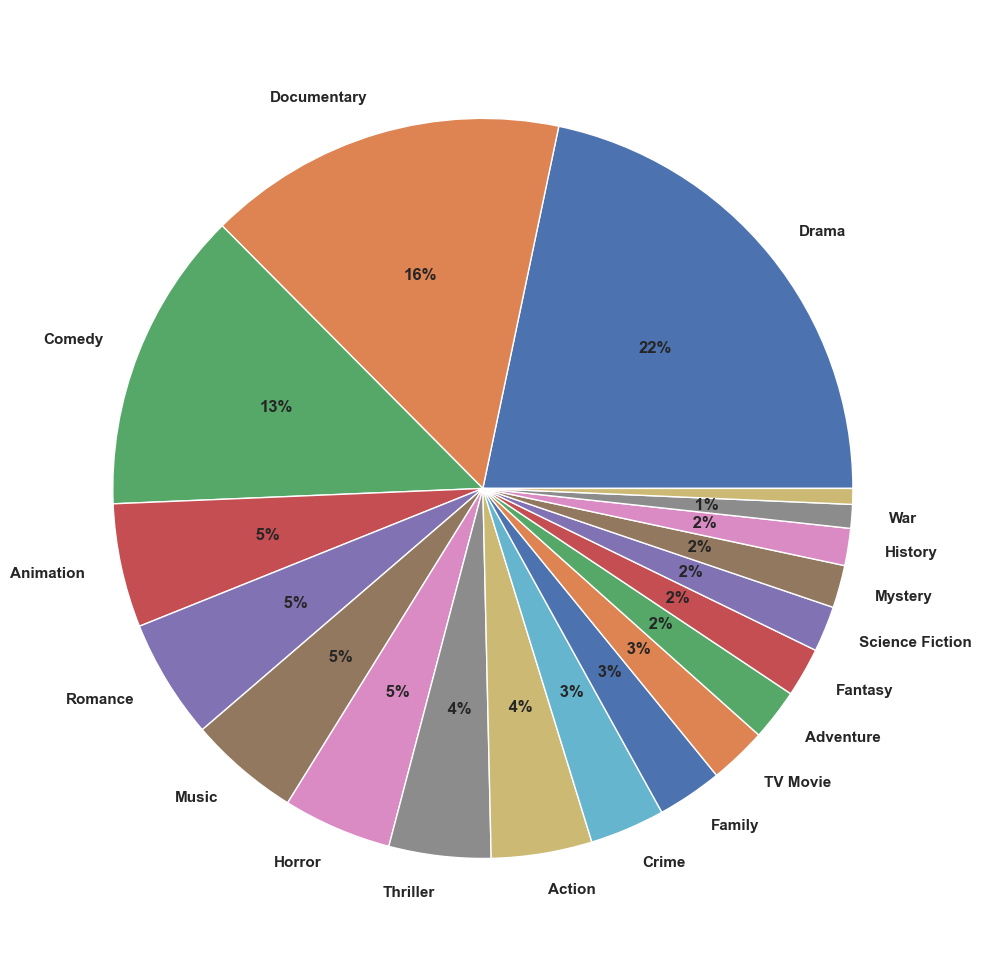

In [32]:
i = 0
genre_count = []
for genre in total_genre_movies.index:
    genre_count.append([genre, total_genre_movies[i]])
    i = i+1
    
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(10, 10))
genre_count.sort(key = lambda x:x[1], reverse = True)
labels, sizes = zip(*genre_count)
labels_selected = [n if v > sum(sizes) * 0.01 else '' for n, v in genre_count]
ax.pie(sizes, labels=labels_selected,
       autopct = lambda x:'{:2.0f}%'.format(x) if x > 1 else '',
       shadow=False, startangle=0)
ax.axis('equal')
plt.tight_layout()

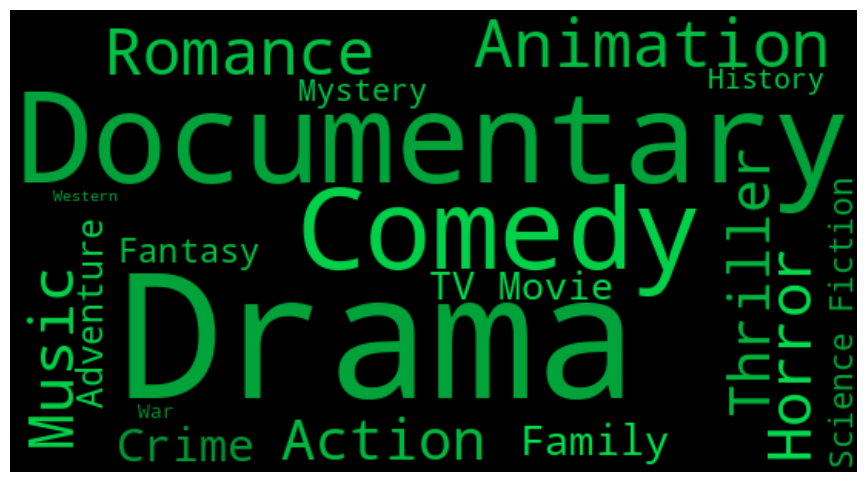

In [33]:
from wordcloud import WordCloud, STOPWORDS

def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

words = dict()
for s in genre_count:
    words[s[0]] = s[1]
tone = 100 # define the color of the words
f, ax = plt.subplots(figsize=(14, 6))
wordcloud = WordCloud(width=550,height=300, background_color='black', 
                      max_words=1628,relative_scaling=0.7,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [34]:
info = pd.DataFrame(tmdb_movies['revenue'].sort_values(ascending=False))
data_set = ['id','popularity','budget','original_title','runtime','genres','vote_average','release_year']
for i in data_set:
    info[i] = tmdb_movies[i]
info.head(10)

,revenue,id,popularity,budget,original_title,runtime,genres,vote_average,release_year
646731,3000000000,1224207,0.000,800000000,Adventures in Bora Bora,5,"Horror, War",0.000,2023.0
3,2923706026,19995,79.932,237000000,Avatar,162,"Action, Adventure, Fantasy, Science Fiction",7.573,2009.0
15,2800000000,299534,91.756,356000000,Avengers: Endgame,181,"Adventure, Science Fiction, Action",8.263,2019.0
282,2320250281,76600,241.285,460000000,Avatar: The Way of Water,192,"Science Fiction, Adventure, Action",7.654,2022.0
17,2264162353,597,102.348,200000000,Titanic,194,"Drama, Romance",7.900,1997.0
56,2068223624,140607,66.772,245000000,Star Wars: The Force Awakens,136,"Adventure, Action, Science Fiction",7.293,2015.0
6,2052415039,299536,154.340,300000000,Avengers: Infinity War,149,"Adventure, Action, Science Fiction",8.255,2018.0
57,1921847111,634649,186.065,200000000,Spider-Man: No Way Home,148,"Action, Adventure, Science Fiction",7.990,2021.0
44,1671537444,135397,54.089,150000000,Jurassic World,124,"Action, Adventure, Science Fiction, Thriller",6.682,2015.0
317,1663075401,420818,63.351,260000000,The Lion King,118,"Adventure, Drama, Family",7.100,2019.0


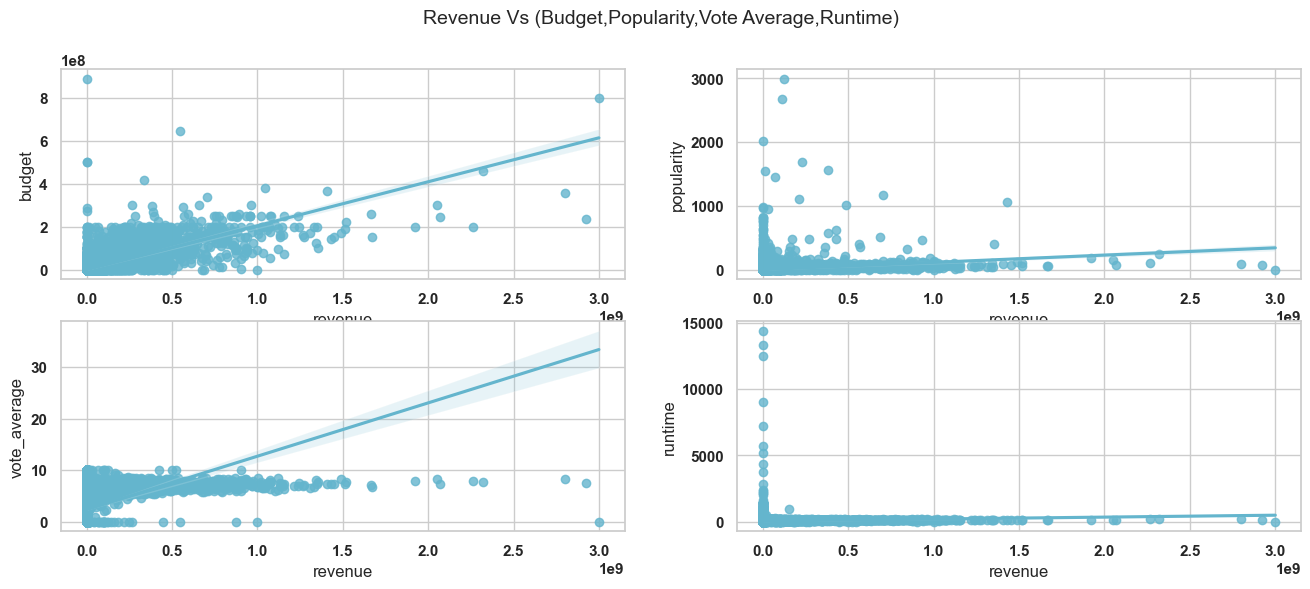

In [35]:
fig, axes = plt.subplots(2,2,figsize = (16,6))
fig.suptitle("Revenue Vs (Budget,Popularity,Vote Average,Runtime)",fontsize=14)
#info.plot(x = ['revenue'],y = ['budget'],kind = "scatter",ax = axes[0][0])
sns.regplot(x=tmdb_movies['revenue'], y=tmdb_movies['budget'],color='c',ax=axes[0][0])
sns.regplot(x=tmdb_movies['revenue'], y=tmdb_movies['popularity'],color='c',ax=axes[0][1])
sns.regplot(x=tmdb_movies['revenue'], y=tmdb_movies['vote_average'],color='c',ax=axes[1][0])
sns.regplot(x=tmdb_movies['revenue'], y=tmdb_movies['runtime'],color='c',ax=axes[1][1])
#axes.scatter(info['revenue'],info['vote_average'])
sns.set_style("whitegrid")

In [36]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })

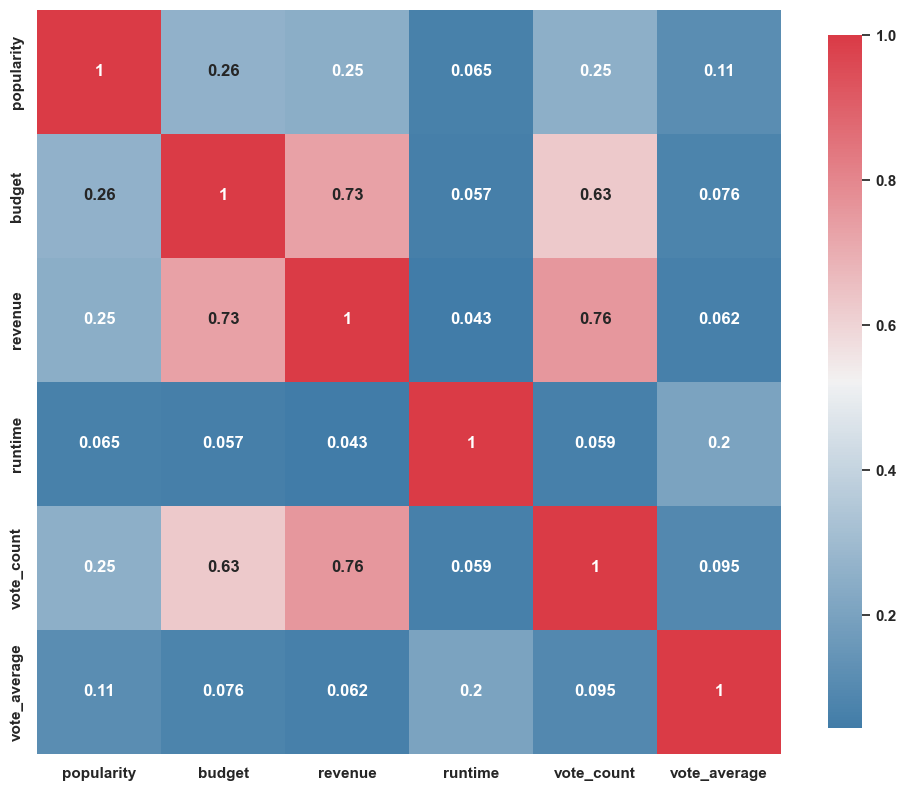

In [37]:
plot_correlation_map(tmdb_movies[['popularity','budget','revenue','runtime','vote_count','vote_average']])